In [2]:
import osmnx
import geopandas
import pandas

MUNICIPIO = "Huarte / Uharte"

This data is obtained from the Government of Navarre's databases. The only information obtained from OpenStreetMap is the supermarkets, which are not available from the government.

In [3]:
test_set = geopandas.read_file("DIRECC_Pol_Edifaltura.shx")

We need to get the limits of the _municipios_ so we can filter and show only the desired ones.

<Axes: >

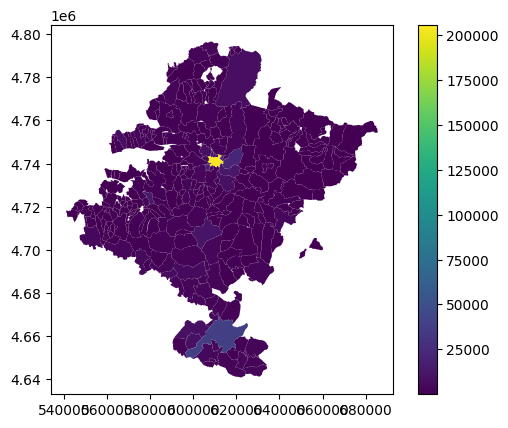

In [8]:
test_set2 = geopandas.read_file("limite_municipio.shx") 
test_set2 = test_set2.to_crs(test_set.crs)
test_set2[["MUNICIPIO", "ALTCAPITAL", "HABIT2023"]].head()
#test_set2["MUNICIPIO"].to_csv('municipios.txt', sep=' ', index=False)
test_set2[test_set2["MUNICIPIO"] != "Pamplona / Iruña"].plot("HABIT2023", legend=True)

<Axes: >

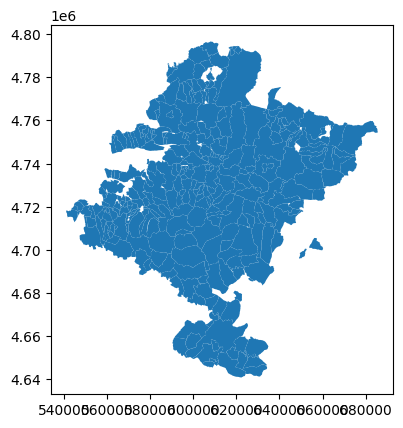

In [11]:
test_set2.plot()

    FEATURE  CMUNICIPIO                   MUNICIPIO  ALTCAPITAL  ALTMEDIA  \
85  1000025          86  Valle de Egüés / Eguesibar         503       598   

    HABIT2003  HABIT2004  HABIT2005  HABIT2006  HABIT2007  ...  HABIT2018  \
85       3985       4472       4912       5379       7079  ...      20774   

    HABIT2019  HABIT2020  HABIT2021  HABIT2022  HABIT2023    GEOM_AREA  \
85      21128      21418      21556      21795      22121  53501197.33   

    GEOM_PERI   BEGINLIFE                                           geometry  
85   37556.54  15/02/2024  POLYGON ((616547.837 4743484.973, 616549.199 4...  

[1 rows x 29 columns]


<Axes: >

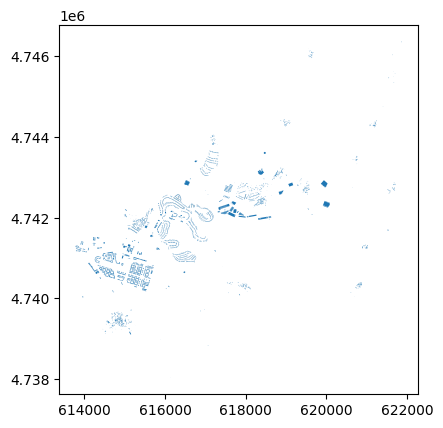

In [13]:
municipio = test_set2.loc[test_set2["MUNICIPIO"]=="Valle de Egüés / Eguesibar"]
#print(municipio)
inters = test_set.overlay(municipio, how='intersection', keep_geom_type=False)
inters.plot()

In [23]:
tags = {'shop': 'supermarket'}
#tags = {'healthcare': True} # All healthcare clinics

# Retrieve data from OSM for Navarra
gdf = osmnx.geometries_from_place('Navarra', tags)

# Filter to keep only points (nodes) with known supermarket name
supermarkets = gdf[gdf["brand"] != 'NaN']


C:\Users\pablo\AppData\Local\Temp\ipykernel_11968\1078676127.py:4: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = osmnx.geometries_from_place('Navarra', tags)
e:\Códigos fuente\geopandas-test\.conda\Lib\site-packages\osmnx\features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


We need to convert the points to the same CRS as the government's data uses a different one.

In [24]:
supermarkets = supermarkets.to_crs(inters.crs)

In [25]:
points = supermarkets["geometry"]
inters["centroid"] = inters.centroid

#inters["distance"] = inters["centroid"].distance(points)
#inters["distance"]
#inters.plot("distance", legend=True)

We generate the map and save it to an html file

In [28]:
inters["dist_market"] = [points.distance(point).min() for point in inters["centroid"]]
i = inters.explore("dist_market", legend=True, tooltip="dist_market")
i.save("mapa.html")

Finally, we can check which building is the furthest from a supermarket

In [30]:
maxval = inters["dist_market"].max()
inters.loc[inters["dist_market"]==maxval]

,FEATURE_1,ETIQUETA,ALTURA,GEOM_AREA_1,GEOM_PERI_1,BEGINLIFE_1,FEATURE_2,CMUNICIPIO,MUNICIPIO,ALTCAPITAL,...,HABIT2020,HABIT2021,HABIT2022,HABIT2023,GEOM_AREA_2,GEOM_PERI_2,BEGINLIFE_2,geometry,centroid,dist_market
219,10100005,I,4,139.41,50.4,21/06/2024,1000025,86,Valle de Egüés / Eguesibar,503,...,21418,21556,21795,22121,53501197.33,37556.54,15/02/2024,"POLYGON ((621865.25 4746350.37, 621857.313 474...",POINT (621863.416 4746359.628),6926.591318
